In [4]:
from google.colab import files
uploaded = files.upload()


Saving Dataset .csv to Dataset  (1).csv


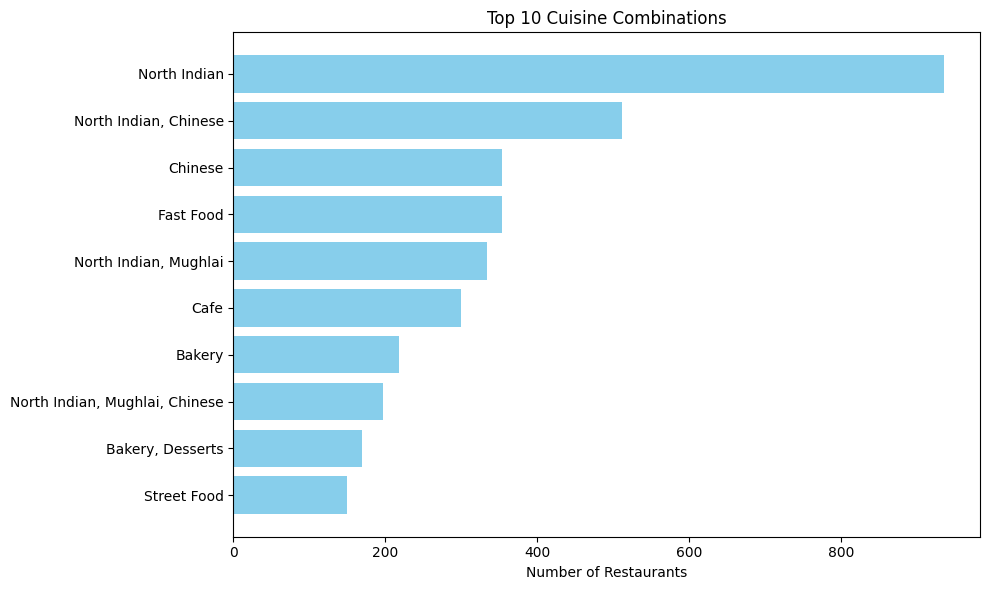

,Cuisines,Count,Average Rating
0,North Indian,936,1.672329
1,"North Indian, Chinese",511,2.421722
2,Chinese,354,2.042090
3,Fast Food,354,2.118362
4,"North Indian, Mughlai",334,2.888623
5,Cafe,299,2.890970
6,Bakery,218,1.924312
7,"North Indian, Mughlai, Chinese",197,2.568528
8,"Bakery, Desserts",170,2.317647
9,Street Food,149,2.161745


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Dataset .csv")

# Drop missing cuisines
df_cuisine = df.dropna(subset=['Cuisines'])

# Top 10 cuisine combinations
top_combinations = df_cuisine['Cuisines'].value_counts().head(10)

# Average rating for top combinations
avg_ratings = df_cuisine.groupby('Cuisines')['Aggregate rating'].mean()
combined_df = pd.DataFrame({
    'Count': top_combinations,
    'Average Rating': avg_ratings[top_combinations.index]
}).sort_values(by='Count', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(combined_df.index[::-1], combined_df['Count'][::-1], color='skyblue')
plt.xlabel("Number of Restaurants")
plt.title("Top 10 Cuisine Combinations")
plt.tight_layout()
plt.show()

# Show the analysis
combined_df.reset_index().rename(columns={'index': 'Cuisine Combination'})
